In [15]:
import string
import numpy as np
import sys
import csv
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams.update({'font.size': 8})
plt.rcParams.update({'font.family': 'sans-serif'})
plt.rcParams.update({'xtick.labelsize': 7})
plt.rcParams.update({'ytick.labelsize': 7})

sns.set_style("ticks")
plt.rcParams['scatter.edgecolors'] = 'black'
plt.rcParams['font.sans-serif'] = "Arial"
# Then, "ALWAYS use sans-serif fonts"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['axes.linewidth'] = 0.5



antibody = '6261'

if antibody == '9114':
    antigens = ['H1','H3','FluB']
    exps = {'H1':['a','b','c'],
            'H3':['d','e','f'],
            'FluB':['g','h','i']}
    concs = {'H1':['7','75','7','85','9','95','10','105','11','115','12','0'],
            'H3':['6','65','7','75','7','85','9','95','10','105','11','0'],
            'FluB':['6','65','7','75','7','85','9','95','10','105','11','0']}
    
elif antibody == '6261':
    antigens = ['H1','H9']
    exps = {'H1':['a','b','c'],
            'H9':['x','y','z']}
    concs = {'H1':['7','75','7','85','9','95','10','105','11','115','12','0'],
             'H9':['7','75','7','85','9','95','10','105','11','115','12','0']}
 

In [7]:
df = pd.DataFrame(columns = ['antibody', 'antigen', 'replicate','mean_coverage','median_coverage'])

for antigen in antigens:

    for i in range(3):
        exp = exps[antigen][i]
        cov_means = []
        cov_medians = []

        for conc in concs[antigen]:
            count_dict = {}
            # sum sequence counts across bins
            for binn in range(4):
                count_reader = csv.reader(open('seq_counts/Binding/6261'+exp+'/correct_counts_6261_'+exp+'_'+conc+'_'+str(binn+1)+'.txt','r'),delimiter='\t')

                for row in count_reader:
                    if len(row) == 3:
                        geno,space,count = row
                        if geno in count_dict.keys():
                            count_dict[geno] += float(count)
                        else:
                            count_dict[geno] = float(count)

            # get mean and median coverage
            counts = np.array(list(count_dict.values()),dtype=float)
            cov_means.append(np.mean(counts))
            cov_medians.append(np.median(counts))

        mean_cov_mean = np.mean(cov_means)
        mean_cov_median = np.mean(cov_medians)

        print(mean_cov_mean,mean_cov_median)

        df = df.append({'antibody' : antibody, 'antigen' : antigen, 'replicate' : i+1,
                        'mean_coverage':mean_cov_mean,'median_coverage':mean_cov_median},
                           ignore_index = True)

#df.to_csv('stats/6261_coverage_summary.csv',index=False)


1133.7658127482266 1161.5
951.0830133555255 890.0
786.7652013858118 785.625
1009.5262256612205 1046.75
961.957419612574 978.5833333333334
833.3583048172204 819.0833333333334


In [8]:
df

,antibody,antigen,replicate,mean_coverage,median_coverage
0,6261,H1,1,1133.765813,1161.500000
1,6261,H1,2,951.083013,890.000000
2,6261,H1,3,786.765201,785.625000
3,6261,H9,1,1009.526226,1046.750000
4,6261,H9,2,961.957420,978.583333
5,6261,H9,3,833.358305,819.083333


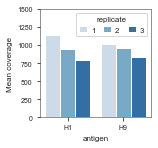

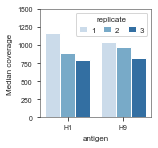

In [39]:
fig,ax = plt.subplots(figsize=(2,2))
sns.barplot(data=df,x='antigen',y='mean_coverage',hue='replicate',palette='Blues',ax=ax)
plt.ylabel('Mean coverage')
plt.ylim([0,1500])
ax.legend(ncol=4,handlelength=1,handletextpad=0.5,columnspacing=1,title='replicate')
plt.savefig('images/6261_mean_cov.pdf')
plt.show()

fig,ax = plt.subplots(figsize=(2,2))
sns.barplot(data=df,x='antigen',y='median_coverage',hue='replicate',palette='Blues',ax=ax)
plt.ylabel('Median coverage')
ax.legend(ncol=4,handlelength=1,handletextpad=0.5,columnspacing=1,title='replicate')
plt.ylim([0,1500])
plt.savefig('images/6261_median_cov.pdf')
plt.show()

